In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import PCA

In [4]:
df_codis_info = pd.read_csv("data/codis_info.csv")

### PCA

In [5]:
ar_codis_RGB = df_codis_info.filter(regex="[RGB]").values
clt = PCA(3)
pca_RGB = clt.fit_transform(ar_codis_RGB)

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(pca_RGB[:,0], pca_RGB[:,1], pca_RGB[:,2], c=cluster, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

### DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
dbscan = DBSCAN(eps = 80)
cluster = dbscan.fit_predict(ar_codis_RGB)

In [9]:
pd.Series(cluster).value_counts()

 0    373
 3    275
 2    256
 1    166
-1     43
 4      3
dtype: int64

In [10]:
from ipywidgets import widgets

In [11]:
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widget-interact',))

##### Clustering 값 확인

In [12]:
from utils.imageprocessing import plot_colors

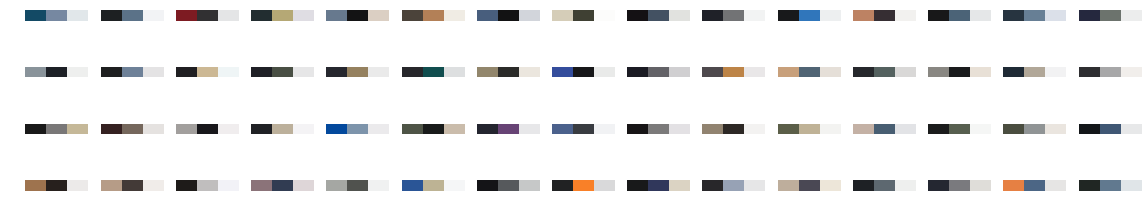

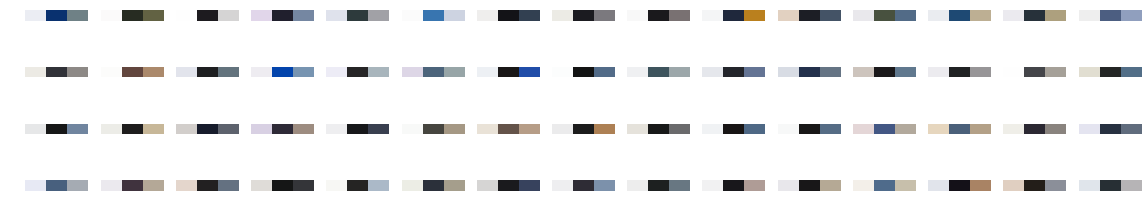

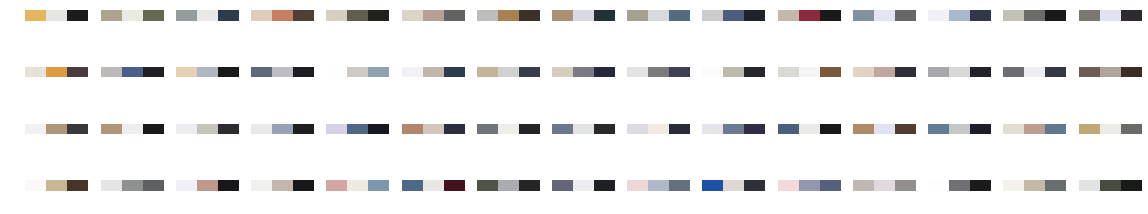

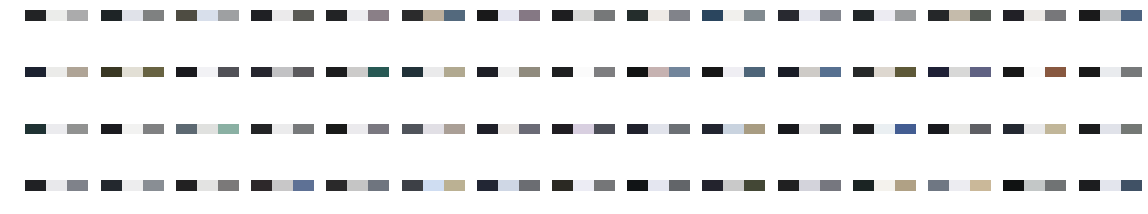

In [13]:
for k in range(4):
    idx_k = np.where(cluster == k)[0]

    k_codis = df_codis_info.iloc[idx_k]

    k_codis_ratio = k_codis.filter(regex="ratio").values
    k_codis_color = k_codis.filter(regex="[RGB]").values
    
    print("="*50)
    
    plt.figure( figsize = (20, 4))    
    for idx in range(60):
        plt.subplot(4, 15, idx+1)
        bar = plot_colors(np.array([0.33, 0.33, 0.33]), k_codis_color[idx].reshape(3,3))
        plt.imshow(bar)
        plt.axis("off")
    plt.show()

- 검정-약간검정-밝음
- 밝음-검정-약간검정
- 밝음-약간검정-검정
- 검정-밝음-약간검정